__Random forest: A non-parametric algorithm. It is an example of an ensemble method__

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


### Motivating Random Forests: Decision Trees

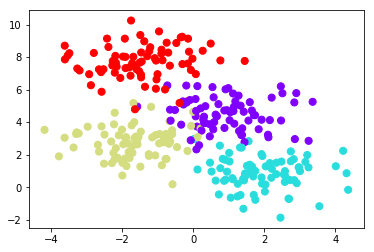

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                 random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [41]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax= ax or plt.gca()
    
    # plot training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    Z =  model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap=cmap, clim=(y.min(), y.max()),
                          zorder=1)
    
    ax.set(xlim=xlim, ylim=ylim)

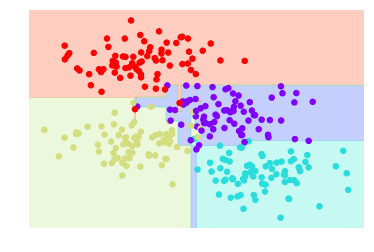

In [42]:
visualize_classifier(DecisionTreeClassifier(), X, y)

<function helper_05_08.plot_tree_interactive.<locals>.interactive_tree>

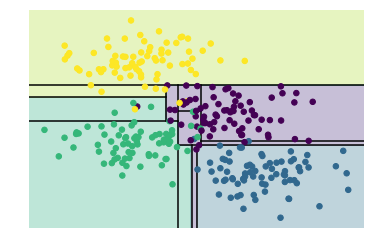

In [48]:
import helper_05_08
helper_05_08.plot_tree_interactive(X, y)

#### Decision trees and overfitting

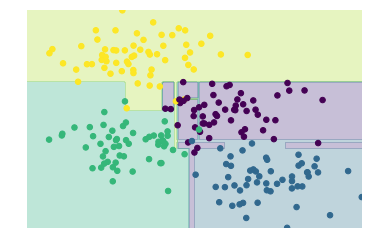

In [50]:
helper_05_08.randomized_tree_interactive(X, y)

### Ensembles of Estimators: Random Forest
we can combine multiple overfitting estimators to reduce the overfitting effect. This is what underlies an ensemble method known as bagging.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

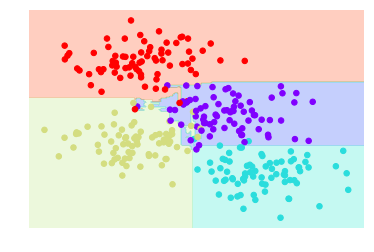

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                       random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

we have randomized the data by fitting each estimator with a random
subset of 80% of the training points. 
In practice, decision trees are more effectively
randomized when some stochasticity is injected in how the splits are chosen;
this way, all the data contributes to the fit each time, but the results of the fit still have the desired randomness.

The `RandomForestClassifier` estimator helps to achieve this. And may be done in parallel

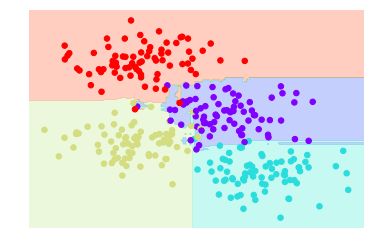

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

Much better!!

### Random Forest Regression

<Container object of 3 artists>

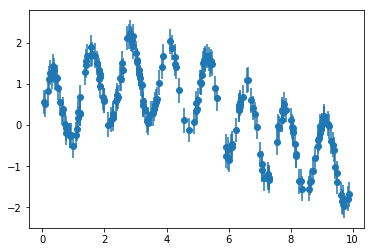

In [55]:
# example
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.rand(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

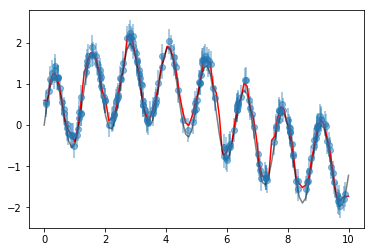

In [64]:
# we can fit the data with a random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 100)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5)

### Example: Random Forest for Classifying Digits

In [68]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

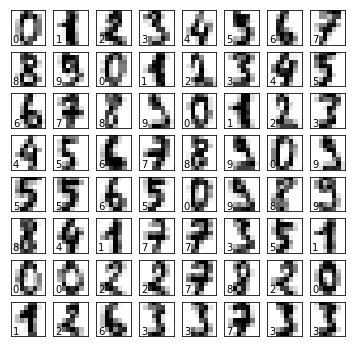

In [74]:
# visualize first few data points
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust()

# plot the digits
for i in range(64):
    ax = fig.add_subplot(8, 8, i +1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    ax.text(0, 7, str(digits.target[i]))

In [77]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, 
                                               random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [81]:
from sklearn import metrics
print(metrics.classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        37
          1       0.95      0.98      0.97        43
          2       1.00      0.95      0.98        44
          3       0.98      0.98      0.98        45
          4       1.00      0.97      0.99        38
          5       0.96      0.98      0.97        48
          6       1.00      1.00      1.00        52
          7       0.96      1.00      0.98        48
          8       0.98      0.94      0.96        48
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



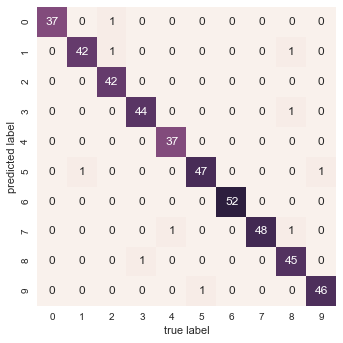

In [92]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
import seaborn as sns
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

### Summary of Random Forests

- fast training and prediction times
- ensemble allow a probabilistic classification
- The nonparametric model is extremely flexible, and can thus perform well on
tasks that are underfit by other estimators.

Disadvantage: The results are not interpretable